__Author: Christian Urcuqui__

__Date: 23 october 2018__

![image](../../Utilities/Rl_agent.png)

# Reinforcement Learning

The aim of this notebook is to understand the theory, the state of art, it's frameworks and applications of reinforcement learning. I'm going to use some examples and the explanations from the literature that you can see in the references section. This notebook is divided in the next sections:

+ [Introduction](#Introduction)
+ [frameworks](#Frameworks)
+ [SARSA](#SARSA)
+ [An-extended-Example:-Tic-tac-toe](#An-extended-Example:-Tic-tac-toe)

## Introduction

Reinforcement learning is learning what to do - how to map situations to actions - so as to maximize a numerical reward signal. The learner must discover which actions yield the most reward by trying them. The idea here is the loop of cases, actions may affect not only the immediate reward but also the next situation and, through that, all subsequent rewards. 

We can mention two characteristics - trial-and-error search delayed reward - are two most important distinguishing features of reinforcement learning. 

_Reinforcement Learning_ is defined by characterizing a _learning problem_ through the interaction with environments. The objective of this approach is to reach a goal which is reaching by rewards obtained from the environment.

A full specification of _reinforcement learning_ problem in terms of optimal control of Markov decision process, where the idea is to capture the most important aspects of the real problem facing a learning agent interacting with its environment  to archieve the goal. In effect, this agent must be able to sense the state of the environment and take actions wich affect the state. The formulation includes three aspects -__sensation, action, and goal__- in their simplest forms without trivializing any of them. 



<img src="https://cdn-images-1.medium.com/max/1000/1*1qBauAy9xWzNFt1N_mmfEw.gif" />

A good example of reinforcement learning is a maze, where the idea is determining the path with the exact right moves.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Prim_Maze.svg/1200px-Prim_Maze.svg.png" width="350" />

+ The agent is the intelligent program
+ The environment is the maze
+ The state is the place in the maze where the agent is
+ The action is the move we take to move to the next state
+ The reward is the points associated with reaching a particular state. It can be positive, negative, or zero

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Reinforcement_learning_diagram.svg/250px-Reinforcement_learning_diagram.svg.png" />

As we can see in the next image, _reinforcement learning_ sits at the intersaction of many different fields of science.
<img src="https://www.researchgate.net/profile/Ahmad_Hammoudeh3/publication/323178749/figure/fig1/AS:594073228423171@1518649503854/Reinforcement-Learning-faces-10.png" width="400" />

One challenges of this area is the trade-off between __exploration__ and __exploitation__. To obtain a lot of reward, the agent must prefer actions that it has tried in the past and found to be effective in producing a reward (exploitation). But to discover such actions, it has to try actions that it has not selected before (exploration). The dilemma is that neither exploration nor exploitation ca be pusued exclusively without failing at the task. On a stochastic task, each action must be tried many times to gain a reliable estimate of its expected reward. 

We can see the state transition process and the interaction of each feature as the next equation which needs to maximize:

$r0 + \gamma r1 + \gamma r2 + ... +$ where $0 < \gamma < 1$

At reach state transition, the reward is a different value in each step, that is the reason that we have in the last expresion r0, r1, r2, etc. Gamma ($\gamma$) is called a _discount factor_ and it determines what future reward types we get:

+ A value of gamma 0 means the reward is associated with the current state only
+ A gamma value of 1 means that the reward is long-term



We are going to have two constants, these are _gamma_ ($\gamma$) and _lambda_ ($\lambda$).

+ Gamma is used in each state transition and is a constant value at each state change. Gamma allows you to give information about the type of reward you will be getting in every state.
+ Lambda is generally used when we are dealing with temporal difference problems. It is more involved with predictions in successive states. When lambda increases we can infer that the algorithm is learning fast.

The environments in the Reinforcement Learning have the next features:
+ Deterministic
+ Observable
+ Discrete or continiouous
+ Single or multiagent

Solutions in RL can be of single agent types or multiagent types, when we are dealing with complex problems, we use multiagent Reinforcement Learning. Complex problems might have different environments where the agent is doing different jobs to get involved in RL and the agent also wnats to interact. 

Multiagent solutions are based on the non-deterministic approach, because when the multiagent interact, there might be more than one option to change or move to the next state and we have to make decisions based on that ambiguity. Moreover, these agents have dynamic environments comparated to single angents with a lot alernativies. Dynamic environments can involve changing environments in the places to interact with. 

<img src="https://cdn-images-1.medium.com/max/1600/1*BLCc488tqRHMWrBcIkLzGw.png" width="400"/>

_Reinforcement Learning system_ has four main subelements: a policy, a reward function, a value function, and, optionally, a model of the environment.

A _policy_ is a mapping from perceived states of the environment to actions to be taken when in those states (it is called in psychology a set of of stimulus-response rules or associations). In some cases the policy may be a simple function or lookup table, whereas in others it may involve extensive computation such as a search process. 

A _reward function_ defines the goal in a reinforcement learning problem, in other words, it maps each perceived state of the environment to a single number, a _reward_ , indicating the intrinsic desirability of that state. A reinforcement learning agent's objective is to maximize the total reward it receives in the long run. The reward function defines what are the good and bad events for the agent. The policy, π, defines the agent’s behavior and is mapping from the states of the environment to actions: π : S -> A. The policy defines the action to be taken in any state st: at = π(st). The value of a policy π, $V^{\pi}(s_{t})$


A _value function_ specifies what is good in the long run. Roughly speaking, it is the total amount of reward an agent can expect to accumulate over the future, starting from that state. 

A _model_ is used for planning, where the model can find information about the resultant next state and the next reward for a current state and action. 

## Markov Decision Process

Environments in RF are represented by the Markov Decision Process (MDP).
+ SS is a finite set of states. 
+ AA is a finite set of actions.
+ $T:S×A×S→[0,1]T:S×A×S→[0,1]$ is a transition model that maps (state, action, state) triples to probabilities.
+ T(s,a,s′)T(s,a,s′) is the probability that you’ll land in state s′s′ if you were in state ss and took action aa.

`
T(s,a,s′)=P(s′|s,a)T(s,a,s′)=P(s′|s,a)
`

$R:S×S→RR:S×S→R$ is a reward function that gives a real number that represents the amount of reward (or punishment) the environment will grant for a state transition. 

We can define the expected utility for the agent to be the accumulated rewards it gets throughout its experience with the environment. If the agent goes through the states s0,s1,…,sn−1,sns0,s1,…,sn−1,sn, you could formally define its expected utility as follows:

$\sum nt = 1\gamma t E [R(st−1,s\theta)] \sum t =1n \gamma t E [R(st−1,st)]$

### hello world (searching the treasure on right)

Let's see the next example proposed by MorvanZhou, the exercise has an escenario where we can find a letter O as wanderer which wants to get the trasure T as fast as it can, it look like this:

```
O-----T
```
The wanderer tries to find the best path to reach the treasure, during each episode, the steps the wanderer takes to reach the treasure are counted. With each episode, the condition improves and the number of steps declines. 

+ The available actions are left or right

ACTIONS = ['left', 'right']

+ The wandered can be considered the agent 
+ The number of states (steps) is limited in this example to 6

N_STATES = 6

We must pay attention to the hyperparameters in a reinforcement learning approach, they are:

+ _Epsilon_ is the greedy factor
+ _Alpha_ is the learning rate
+ _Gamma_ is the discount factor

The maximum number of episodes in this case is 13. The refresh rate is when the scenario is refreshed

To create the process (it is called **Q Learning**) from which the computer learns, we have to formulate a table (it is called **Q table**). All the key elements are stored in the Q table and the decisions are made based on the Q table.

In [2]:
# these are the libraries used in the example
import numpy as np
import pandas as pd
import time

In [3]:
np.random.seed(2)
N_STATES = 6 # the length of the dimensional world
ACTIONS = ['left', 'right'] # available actions
EPSILON = 0.9 # greedy factor
ALPHA = 0.1  # learning rate
GAMMA = 0.9 # discount factor
MAX_EPISODES = 13 # maximum episodes
FRESH_TIME = 0.3 # fresh time for one move

In [4]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(
    np.zeros((n_states, len(actions))), # q_table initial values
    columns = actions, # action's name
    )
    return table

build_q_table(N_STATES, ACTIONS)

,left,right
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [5]:
def choose_action(state, q_table):
    # This is how to choose an action
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
        action_name = np.random.choice(ACTIONS)
    else:   # act greedy
        action_name = state_actions.idxmax()    # replace argmax to idxmax as argmax means a different function in newer version of pandas
    return action_name

choose_action(2, build_q_table(N_STATES, ACTIONS))

'right'

Now we create the environment and determine how the agents will work within the environment

In [1]:
def get_env_feedback(S, A):
    """
    this method is oriented to determine how an agent will interact 
    with the enviroment
    
    Parameters:
    S (int): current state 
    A (str): current action that the agent takes
    
    Returns:
    tuple (next state, reward): it returns a tuple that has the position
    of the next state and the reward of the current movement
    """
    if A == 'right':    # move right
        if S == N_STATES - 2:   # terminate
            S_ = 'terminal'
            R = 1
        else:
            S_ = S + 1
            R = 0
    else:   # move left
        R = 0
        if S == 0:
            S_ = S  # reach the wall
        else:
            S_ = S - 1
    return S_, R

In [7]:
print("we are far away from the goal %s"%str(get_env_feedback(2, "left")))

print("if we are close to the goal and the action is right we are going to get a point %s" % str(get_env_feedback(N_STATES-2, "right")))

we are far away from the goal (1, 0)
if we are close to the goal and the action is right we are going to get a point ('terminal', 1)


This function prints the wanderer and treasure hunt conditions

In [43]:
def update_env(S, episode, step_counter):
    """
    This is how environment be updated
    """
    env_list = ['-']*(N_STATES-1) + ['T']   # '---------T' our environment
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
        env_list[S] = 'o'
        interaction = ''.join(env_list)
        print('\r{}'.format(interaction), end='')
        time.sleep(FRESH_TIME)

In [44]:
# The rl() method calls the Q Learning scenario
def rl():
    # main part of RL loop
    q_table = build_q_table(N_STATES, ACTIONS)
    for episode in range(MAX_EPISODES):
        step_counter = 0
        S = 0
        is_terminated = False
        update_env(S, episode, step_counter)
        while not is_terminated:

            A = choose_action(S, q_table)
            S_, R = get_env_feedback(S, A)  # take action & get next state and reward
            q_predict = q_table.loc[S, A]
            if S_ != 'terminal':
                q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
            else:
                q_target = R     # next state is terminal
                is_terminated = True    # terminate this episode

            q_table.loc[S, A] += ALPHA * (q_target - q_predict)  # update
            S = S_  # move to next state

            update_env(S, episode, step_counter+1)
            step_counter += 1
    return q_table

In [45]:
# let's start it 
q_table = rl()
print('\r\nQ-table:\n')
print(q_table)

                                
Q-table:

       left     right
0  0.000000  0.004849
1  0.000000  0.033012
2  0.002447  0.113529
3  0.000000  0.345873
4  0.002268  0.745813
5  0.000000  0.000000


## SARSA

State-Action-Reward-State-Action

The difference between SARSA and QLearning is that SARSA takes the next action based on the current policy while qlearning takes the action with maximum utility of next state.

*ε-greedy policy*

+ Generate a random number r ∈ [0,1] 
+ if r<ε 
    + choose an action derived from the Q values 
+ Else
    + choose a random action

The value of ε determines the exploration-exploitation of the agent.
+ if ε is large, less exploration, more exploitation
+ if ε is small, the agent will explore the environment even more

the next example was taken from https://towardsdatascience.com/reinforcement-learning-temporal-difference-sarsa-q-learning-expected-sarsa-on-python-9fecfda7467e

In [18]:
import numpy as np

def epsilon_greedy(Q, epsilon, n_actions, s, train=False):
    """
    This method is dedicated to search the action to do for the agent
    ------
    parameters:
    Q (): Q values state x action -> value
    epsilon (): for exploration
    n_actions (): number of actions   
    train (bool): train if true then no random actions selected
    
    Returns:
    action to take for the agent
    """
    
    if train or np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action

let's see a quick example of the algorithm on the Taxi-v2 gym environment

In [19]:
import gym
import numpy as np
import time 


def init_q(s, a, _type="ones"):
    """
    This method is dedicated to create the function for each s and a Q(s,q) 
    ------
    parameters:
    s (): number of states
    a (): the number of actions
    _type (): type random, ones, or zeros for the initialization    
    
    Returns:
    a numpy array based on type and with shape (s,a)
    """
    if _type == "ones":
        return np.ones((s, a))
    elif _type == "random":
        return np.random.random((s,a))
    elif _type == "zeros":
        return np.zeros((s,a))  
    

In [20]:
def sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests, render = False, test = False):
    """
    this method implements the SARSA framework which uses the current policy
    ------
    parameters:
    alpha (): learning rate
    gamma (): decay factor
    epsilon (): for exploration
    max_steps (): for max step in each episode
    n_tests (): number of test spisodes
    
    """
    
    env = gym.make("Taxi-v3")
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions, _type="ones")
    timestep_reward = []
    for episode in range(episodes):
        print(f"Episode: {episode}")
        total_reward = 0
        s = env.reset()
        a = epsilon_greedy(Q, epsilon, n_actions, s)
        t = 0
        done = False
        while t < max_steps:
            if render:
                env.render()
            t += 1
            s_, reward, done, info = env.step(a)
            total_reward += reward
            a_ = epsilon_greedy(Q, epsilon, n_actions, s_)
            if done:
                Q[s, a] += alpha * (reward - Q[s,a])
            else:
                Q[s, a] += alpha * ( reward + (gamma * Q[s_, a_] ) - Q[s, a] ) 
            s, a = s_, a_    
            if done:
                if render:
                    print(f"This episode took {t} timesteps and reward {total_reward}")
                timestep_reward.append(total_reward)
                break    
    if render:
        print(f"Here are the Q values:\n{Q}\nTesting now:")
    if test:
        test_agent(Q, env, n_tests, n_actions)
    return timestep_reward


def test_agent(Q, env, n_tests, n_actions, delay=0.1):
    for test in range(n_tests):
        print(f"Test #{test}")
        s = env.reset()
        done = False
        epsilon = 0
        total_reward = 0
        while True:
            time.sleep(delay)
            env.render()
            a = epsilon_greedy(Q, epsilon, n_actions, s, train=True)
            print(f"Chose action {a} for state {s}")
            s, reward, done, info = env.step(a)
            total_reward += reward
            if done:
                print(f"Episode reward: {total_reward}")
                time.sleep(1)
                break
                
if __name__ =="__main__":
    alpha = 0.4
    gamma = 0.999
    epsilon = 0.9
    episodes = 3000
    max_steps = 2500
    n_tests = 20
    #timestep_reward = sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests, render=True)
    timestep_reward = sarsa(alpha, gamma, epsilon, episodes, max_steps, n_tests)

Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Ep

Episode: 991
Episode: 992
Episode: 993
Episode: 994
Episode: 995
Episode: 996
Episode: 997
Episode: 998
Episode: 999
Episode: 1000
Episode: 1001
Episode: 1002
Episode: 1003
Episode: 1004
Episode: 1005
Episode: 1006
Episode: 1007
Episode: 1008
Episode: 1009
Episode: 1010
Episode: 1011
Episode: 1012
Episode: 1013
Episode: 1014
Episode: 1015
Episode: 1016
Episode: 1017
Episode: 1018
Episode: 1019
Episode: 1020
Episode: 1021
Episode: 1022
Episode: 1023
Episode: 1024
Episode: 1025
Episode: 1026
Episode: 1027
Episode: 1028
Episode: 1029
Episode: 1030
Episode: 1031
Episode: 1032
Episode: 1033
Episode: 1034
Episode: 1035
Episode: 1036
Episode: 1037
Episode: 1038
Episode: 1039
Episode: 1040
Episode: 1041
Episode: 1042
Episode: 1043
Episode: 1044
Episode: 1045
Episode: 1046
Episode: 1047
Episode: 1048
Episode: 1049
Episode: 1050
Episode: 1051
Episode: 1052
Episode: 1053
Episode: 1054
Episode: 1055
Episode: 1056
Episode: 1057
Episode: 1058
Episode: 1059
Episode: 1060
Episode: 1061
Episode: 1062
E

Episode: 1931
Episode: 1932
Episode: 1933
Episode: 1934
Episode: 1935
Episode: 1936
Episode: 1937
Episode: 1938
Episode: 1939
Episode: 1940
Episode: 1941
Episode: 1942
Episode: 1943
Episode: 1944
Episode: 1945
Episode: 1946
Episode: 1947
Episode: 1948
Episode: 1949
Episode: 1950
Episode: 1951
Episode: 1952
Episode: 1953
Episode: 1954
Episode: 1955
Episode: 1956
Episode: 1957
Episode: 1958
Episode: 1959
Episode: 1960
Episode: 1961
Episode: 1962
Episode: 1963
Episode: 1964
Episode: 1965
Episode: 1966
Episode: 1967
Episode: 1968
Episode: 1969
Episode: 1970
Episode: 1971
Episode: 1972
Episode: 1973
Episode: 1974
Episode: 1975
Episode: 1976
Episode: 1977
Episode: 1978
Episode: 1979
Episode: 1980
Episode: 1981
Episode: 1982
Episode: 1983
Episode: 1984
Episode: 1985
Episode: 1986
Episode: 1987
Episode: 1988
Episode: 1989
Episode: 1990
Episode: 1991
Episode: 1992
Episode: 1993
Episode: 1994
Episode: 1995
Episode: 1996
Episode: 1997
Episode: 1998
Episode: 1999
Episode: 2000
Episode: 2001
Episod

Episode: 2815
Episode: 2816
Episode: 2817
Episode: 2818
Episode: 2819
Episode: 2820
Episode: 2821
Episode: 2822
Episode: 2823
Episode: 2824
Episode: 2825
Episode: 2826
Episode: 2827
Episode: 2828
Episode: 2829
Episode: 2830
Episode: 2831
Episode: 2832
Episode: 2833
Episode: 2834
Episode: 2835
Episode: 2836
Episode: 2837
Episode: 2838
Episode: 2839
Episode: 2840
Episode: 2841
Episode: 2842
Episode: 2843
Episode: 2844
Episode: 2845
Episode: 2846
Episode: 2847
Episode: 2848
Episode: 2849
Episode: 2850
Episode: 2851
Episode: 2852
Episode: 2853
Episode: 2854
Episode: 2855
Episode: 2856
Episode: 2857
Episode: 2858
Episode: 2859
Episode: 2860
Episode: 2861
Episode: 2862
Episode: 2863
Episode: 2864
Episode: 2865
Episode: 2866
Episode: 2867
Episode: 2868
Episode: 2869
Episode: 2870
Episode: 2871
Episode: 2872
Episode: 2873
Episode: 2874
Episode: 2875
Episode: 2876
Episode: 2877
Episode: 2878
Episode: 2879
Episode: 2880
Episode: 2881
Episode: 2882
Episode: 2883
Episode: 2884
Episode: 2885
Episod

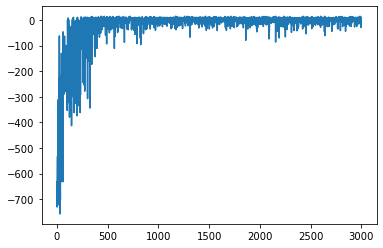

In [12]:
import matplotlib.pyplot as plt

plt.plot(timestep_reward)

## Q-Learning

In [25]:
import gym
import numpy as np
import time

"""
Qlearning is an off policy learning python implementation.
This is a python implementation of the qlearning algorithm in the Sutton and
Barto's book on RL. It's called SARSA because - (state, action, reward, state,
action). The only difference between SARSA and Qlearning is that SARSA takes the
next action based on the current policy while qlearning takes the action with
maximum utility of next state.
Using the simplest gym environment for brevity: https://gym.openai.com/envs/FrozenLake-v0/
"""

def init_q(s, a, type="ones"):
    """
    @param s the number of states
    @param a the number of actions
    @param type random, ones or zeros for the initialization
    """
    if type == "ones":
        return np.ones((s, a))
    elif type == "random":
        return np.random.random((s, a))
    elif type == "zeros":
        return np.zeros((s, a))


def epsilon_greedy(Q, epsilon, n_actions, s, train=False):
    """
    @param Q Q values state x action -> value
    @param epsilon for exploration
    @param s number of states
    @param train if true then no random actions selected
    """
    if train or np.random.rand() < epsilon:
        action = np.argmax(Q[s, :])
    else:
        action = np.random.randint(0, n_actions)
    return action

def qlearning(alpha, gamma, epsilon, episodes, max_steps, n_tests, render = False, test=False):
    """
    @param alpha learning rate
    @param gamma decay factor
    @param epsilon for exploration
    @param max_steps for max step in each episode
    @param n_tests number of test episodes
    """
    env = gym.make('Taxi-v3')
    n_states, n_actions = env.observation_space.n, env.action_space.n
    Q = init_q(n_states, n_actions, type="ones")
    timestep_reward = []
    for episode in range(episodes):
        print(f"Episode: {episode}")
        s = env.reset()
        a = epsilon_greedy(Q, epsilon, n_actions, s)
        t = 0
        total_reward = 0
        done = False
        while t < max_steps:
            if render:
                env.render()
            t += 1
            s_, reward, done, info = env.step(a)
            total_reward += reward
            a_ = np.argmax(Q[s_, :])
            if done:
                Q[s, a] += alpha * ( reward  - Q[s, a] )
            else:
                Q[s, a] += alpha * ( reward + (gamma * Q[s_, a_]) - Q[s, a] )
            s, a = s_, a_
            if done:
                if render:
                    print(f"This episode took {t} timesteps and reward: {total_reward}")
                timestep_reward.append(total_reward)
                break
    if render:
        print(f"Here are the Q values:\n{Q}\nTesting now:")
    if test:
        test_agent(Q, env, n_tests, n_actions)
    return timestep_reward

def test_agent(Q, env, n_tests, n_actions, delay=1):
    for test in range(n_tests):
        print(f"Test #{test}")
        s = env.reset()
        done = False
        epsilon = 0
        while True:
            time.sleep(delay)
            env.render()
            a = epsilon_greedy(Q, epsilon, n_actions, s, train=True)
            print(f"Chose action {a} for state {s}")
            s, reward, done, info = env.step(a)
            if done:
                if reward > 0:
                    print("Reached goal!")
                else:
                    print("Shit! dead x_x")
                time.sleep(3)
                break


if __name__ =="__main__":
    alpha = 0.4
    gamma = 0.999
    epsilon = 0.9
    episodes = 3000
    max_steps = 2500
    n_tests = 2
    timestep_reward_q_learning = qlearning(alpha, gamma, epsilon, episodes, max_steps, n_tests, test = False)
    print(timestep_reward)

Episode: 0
Episode: 1
Episode: 2
Episode: 3
Episode: 4
Episode: 5
Episode: 6
Episode: 7
Episode: 8
Episode: 9
Episode: 10
Episode: 11
Episode: 12
Episode: 13
Episode: 14
Episode: 15
Episode: 16
Episode: 17
Episode: 18
Episode: 19
Episode: 20
Episode: 21
Episode: 22
Episode: 23
Episode: 24
Episode: 25
Episode: 26
Episode: 27
Episode: 28
Episode: 29
Episode: 30
Episode: 31
Episode: 32
Episode: 33
Episode: 34
Episode: 35
Episode: 36
Episode: 37
Episode: 38
Episode: 39
Episode: 40
Episode: 41
Episode: 42
Episode: 43
Episode: 44
Episode: 45
Episode: 46
Episode: 47
Episode: 48
Episode: 49
Episode: 50
Episode: 51
Episode: 52
Episode: 53
Episode: 54
Episode: 55
Episode: 56
Episode: 57
Episode: 58
Episode: 59
Episode: 60
Episode: 61
Episode: 62
Episode: 63
Episode: 64
Episode: 65
Episode: 66
Episode: 67
Episode: 68
Episode: 69
Episode: 70
Episode: 71
Episode: 72
Episode: 73
Episode: 74
Episode: 75
Episode: 76
Episode: 77
Episode: 78
Episode: 79
Episode: 80
Episode: 81
Episode: 82
Episode: 83
Ep

Episode: 986
Episode: 987
Episode: 988
Episode: 989
Episode: 990
Episode: 991
Episode: 992
Episode: 993
Episode: 994
Episode: 995
Episode: 996
Episode: 997
Episode: 998
Episode: 999
Episode: 1000
Episode: 1001
Episode: 1002
Episode: 1003
Episode: 1004
Episode: 1005
Episode: 1006
Episode: 1007
Episode: 1008
Episode: 1009
Episode: 1010
Episode: 1011
Episode: 1012
Episode: 1013
Episode: 1014
Episode: 1015
Episode: 1016
Episode: 1017
Episode: 1018
Episode: 1019
Episode: 1020
Episode: 1021
Episode: 1022
Episode: 1023
Episode: 1024
Episode: 1025
Episode: 1026
Episode: 1027
Episode: 1028
Episode: 1029
Episode: 1030
Episode: 1031
Episode: 1032
Episode: 1033
Episode: 1034
Episode: 1035
Episode: 1036
Episode: 1037
Episode: 1038
Episode: 1039
Episode: 1040
Episode: 1041
Episode: 1042
Episode: 1043
Episode: 1044
Episode: 1045
Episode: 1046
Episode: 1047
Episode: 1048
Episode: 1049
Episode: 1050
Episode: 1051
Episode: 1052
Episode: 1053
Episode: 1054
Episode: 1055
Episode: 1056
Episode: 1057
Episod

Episode: 1992
Episode: 1993
Episode: 1994
Episode: 1995
Episode: 1996
Episode: 1997
Episode: 1998
Episode: 1999
Episode: 2000
Episode: 2001
Episode: 2002
Episode: 2003
Episode: 2004
Episode: 2005
Episode: 2006
Episode: 2007
Episode: 2008
Episode: 2009
Episode: 2010
Episode: 2011
Episode: 2012
Episode: 2013
Episode: 2014
Episode: 2015
Episode: 2016
Episode: 2017
Episode: 2018
Episode: 2019
Episode: 2020
Episode: 2021
Episode: 2022
Episode: 2023
Episode: 2024
Episode: 2025
Episode: 2026
Episode: 2027
Episode: 2028
Episode: 2029
Episode: 2030
Episode: 2031
Episode: 2032
Episode: 2033
Episode: 2034
Episode: 2035
Episode: 2036
Episode: 2037
Episode: 2038
Episode: 2039
Episode: 2040
Episode: 2041
Episode: 2042
Episode: 2043
Episode: 2044
Episode: 2045
Episode: 2046
Episode: 2047
Episode: 2048
Episode: 2049
Episode: 2050
Episode: 2051
Episode: 2052
Episode: 2053
Episode: 2054
Episode: 2055
Episode: 2056
Episode: 2057
Episode: 2058
Episode: 2059
Episode: 2060
Episode: 2061
Episode: 2062
Episod

Episode: 2949
Episode: 2950
Episode: 2951
Episode: 2952
Episode: 2953
Episode: 2954
Episode: 2955
Episode: 2956
Episode: 2957
Episode: 2958
Episode: 2959
Episode: 2960
Episode: 2961
Episode: 2962
Episode: 2963
Episode: 2964
Episode: 2965
Episode: 2966
Episode: 2967
Episode: 2968
Episode: 2969
Episode: 2970
Episode: 2971
Episode: 2972
Episode: 2973
Episode: 2974
Episode: 2975
Episode: 2976
Episode: 2977
Episode: 2978
Episode: 2979
Episode: 2980
Episode: 2981
Episode: 2982
Episode: 2983
Episode: 2984
Episode: 2985
Episode: 2986
Episode: 2987
Episode: 2988
Episode: 2989
Episode: 2990
Episode: 2991
Episode: 2992
Episode: 2993
Episode: 2994
Episode: 2995
Episode: 2996
Episode: 2997
Episode: 2998
Episode: 2999
[-641, -713, -704, -749, -740, -596, -578, -821, -587, -596, -668, -668, -740, -722, -659, -560, -506, -641, -515, -713, -290, -497, -344, -434, -668, -587, -686, -556, -371, -30, -668, -281, -244, -272, -623, -281, -263, -461, -398, -263, -308, -326, -199, -290, -281, -272, -196, -254

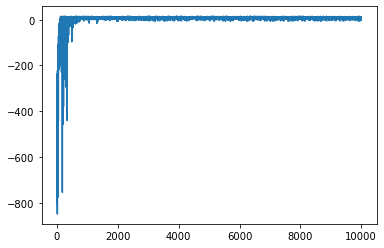

In [22]:
import matplotlib.pyplot as plt

plt.plot(timestep_reward_q_learning)

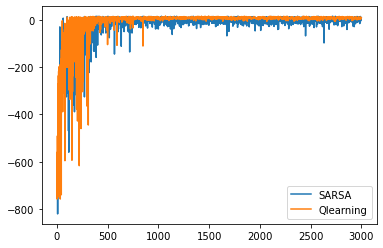

In [26]:
plt.plot(timestep_reward)
plt.plot(timestep_reward_q_learning,)
plt.legend(["SARSA", "Qlearning"])

## Deep Reinforcement Learning

https://www.kaggle.com/alexisbcook/deep-reinforcement-learning

## An extended Example: Tic-tac-toe

How might we construct a player that will find the imperfections in its opponent's play and learn to maximize its changes of winning?

First we set up a table of numbers, one for each possible state of the game. Each number will be the latest estimate of the probability of our winning from that state. 

In [1]:
import numpy as np
import pandas as pd
import time
import sys

In [52]:
np.random.seed(128)
N_STATES = 9 # the length of the dimensional world
ACTIONS = [] # available actions
for i in range(3):
    ACTIONS += [[0, i], [1, i], [2, i]]
EPSILON = 0.9 # greedy factor
ALPHA = 0.1  # learning rate
GAMMA = 0.9 # discount factor
MAX_EPISODES = 50 # maximum episodes
FRESH_TIME = 0.3 # fresh time for one move

Second, we are going to define the Q table to this problem

In [3]:
def build_q_table(n_states, actions):
    table = pd.DataFrame(
    np.zeros((n_states, len(actions))), # q_table initial values
    columns = np.arange(0,9), # action's name
    )
    return table
build_q_table(N_STATES, ACTIONS)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
def choose_action(state, q_table):
    # This is how to choose an action
    state_actions = q_table.iloc[state, :]
    if (np.random.uniform() > EPSILON) or ((state_actions == 0).all()):  # act non-greedy or state-action have no value
        action_name = ACTIONS[np.random.randint(0, len(ACTIONS))]        
    else:   # act greedy
        action_name = [state, state_actions.idxmax()]    # replace argmax to idxmax as argmax means a different function in newer version of pandas
    return action_name

choose_action(5, pd.DataFrame(
    np.zeros((N_STATES, len(ACTIONS))), # q_table initial values
    columns = np.arange(0,9), # action's name
    ))

[1, 0]

In [37]:
def get_env_feedback(S, A):
    # This is how agent will interact with the environment
    lineas = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5,8], [0, 4, 8], [2, 4, 6]]
    for linea in lineas:
        if A[linea[0]] == A[linea[1]] and A[linea[0]] == A[linea[2]] and A[linea[0]] != ' ':
            if S == N_STATES - 3:
                R = 1
                S_ = 'terminal'
            else:
                S_ = 'terminal'
                R = 0.5
        else:
            R = 0            
            S_ = S + 1
        return S_, R

get_env_feedback(2, ['X','X',' ',' ',' ',' ',' ',' ',' '])

(3, 0)

In [6]:
def update_env(S, episode, step_counter):
    global jugada_maquina
    # This is how environment be updated    
    if S == 'terminal':
        interaction = 'Episode %s: total_steps = %s' % (episode+1, step_counter)
        print('\r{}'.format(interaction), end='')
        time.sleep(2)
        print('\r                                ', end='')
    else:
       
        print('total_steps = %s' %S)
        time.sleep(FRESH_TIME) 

In [7]:
def ver_tablero(board):

    print('   |   |')
    print(' ' + board[0] + ' | ' + board[1] + ' | ' + board[2])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + board[3] + ' | ' + board[4] + ' | ' + board[5])
    print('   |   |')
    print('-----------')
    print('   |   |')
    print(' ' + board[6] + ' | ' + board[7] + ' | ' + board[8])
    print('   |   |')  

In [8]:
def game_over(tablero):
    # hay tablas?
    no_tablas = False
    for i in range(0, len(tablero)):
        if tablero[i] == ' ':
            no_tablas = True
            
    # hay ganador?
    if ganador(tablero) == '0' and no_tablas:
        return False
    else:
        return True

In [9]:
def ganador(tablero):
    # combinaciones de estados de ganadores
    lineas = [[0, 1, 2], [3, 4, 5], [6, 7, 8], [0, 3, 6], [1, 4, 7], [2, 5,8], [0, 4, 8], [2, 4, 6]]
    ganador = '0'
    for linea in lineas:
        if tablero[linea[0]] == tablero[linea[1]] and tablero[linea[0]] == tablero[linea[2]] and tablero[linea[0]] != ' ':
            ganador = tablero[linea[0]]
    return ganador

In [46]:
def juega_ordenador(S, tablero):
    global jugada_maquina
    exit = True
    while(exit):        
        A = choose_action(S, q_table)
        if [0,0] == A:
            jugada_maquina = 0
        elif [0,1] == A:
            jugada_maquina = 1 
        elif [0,2] == A:
            jugada_maquina = 2 
        elif [1,0] == A:
            jugada_maquina = 3
        elif [1,1] == A:
            jugada_maquina = 4
        elif [1,2] == A:
            jugada_maquina = 5
        elif [2,0] == A:
            jugada_maquina = 6
        elif [2,1] == A:
            jugada_maquina = 7
        elif [2,2] == A:
            jugada_maquina = 8
        if tablero[jugada_maquina] == ' ':
            tablero[jugada_maquina] = 'X'
            exit = False
    return tablero, jugada_maquina

In [12]:
def juega_humano(tablero):
    ok= False
    while not ok:
        casilla = input("Casilla?")
        # obtenemos la posición de la casilla de 1-9 y comparamos con su respectivo indice en la lista
        if str(casilla) in '0123456789' and len(str(casilla)) == 1 and tablero[int(casilla)-1] == ' ':
            # asignamos a la casilla del jugador un valor de -1
            
            tablero[int(casilla)-1] = 'O'
            ok = True
        if casilla == "exit":
            sys.exit(0)
    return tablero

Training alone

In [53]:
#traning phase 1

# Execute this cell in order to start the game 
q_table = build_q_table(N_STATES, ACTIONS)

for i in range(MAX_EPISODES):    
    tablero = [' ',' ',' ',' ',' ',' ',' ',' ',' ']
    step_counter = 0
    S = 0    
    is_terminated = False
    while(is_terminated==False):        
        print("step: " + str(step_counter)+ "\n")
        ver_tablero(tablero)        
        tablero, A = juega_ordenador(S, tablero)
        # update the environment and the learning process
        S_, R = get_env_feedback(S, tablero)  # take action & get next state and reward
        q_predict = q_table.loc[step_counter, A]
        if game_over(tablero) or S_ == 'terminal':
            q_target = R     # next state is terminal
            is_terminated = True    # terminate this episode
            
        else:
            q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
        
        q_table.loc[step_counter, A] += ALPHA * (q_target - q_predict)  # update
       
        S = S_  # move to next state       
        step_counter += 1 
    ver_tablero(tablero)
    g = ganador(tablero)
    if g == '0':
        gana = "Tablas"
    elif g == 'O':
        gana = "Jugador"
    else:
        gana = "Ordenador"

    print("Ganador: " + gana)
    print("Episode: " + str(i))
    episode += 1   
q_table

step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   | X |  
   |   |
step: 2

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X | X |  
   |   |
step: 3

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X | X |  
   |   |
step: 4

   |   |
 X |   | X
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X | X |  
   |   |
   |   |
 X | X | X
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X | X |  
   |   |
Ganador: Ordenador
Episode: 0
step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
   |   |  
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 


   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 X | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
   |   |
 X | X | X
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
Ganador: Ordenador
Episode: 17
step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X |   |  
   |   |
step: 3

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X |   | X
   |   |
step: 4

   |   |
 X | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
 X |   | X
   |   |
   |   |
 X | X |  
   |  

step: 1

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 X |   |  
   |   |
-----------
   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 3

   |   |
 X |   |  
   |   |
-----------
   |   |
 X |   |  
   |   |
-----------
   |   |
   |   | X
   |   |
step: 4

   |   |
 X |   |  
   |   |
-----------
   |   |
 X |   | X
   |   |
-----------
   |   |
   |   | X
   |   |
step: 5

   |   |
 X | X |  
   |   |
-----------
   |   |
 X |   | X
   |   |
-----------
   |   |
   |   | X
   |   |
   |   |
 X | X | X
   |   |
-----------
   |   |
 X |   | X
   |   |
-----------
   |   |
   |   | X
   |   |
Ganador: Ordenador
Episode: 29
step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |


step: 1

   |   |
 X |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 X | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 3

   |   |
 X | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   | X
   |   |
   |   |
 X | X |  
   |   |
-----------
   |   |
   | X |  
   |   |
-----------
   |   |
   |   | X
   |   |
Ganador: Ordenador
Episode: 41
step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
   | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
   | X |  
   |   |
-----------
   |   |
   | X |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 3

   |   |
   | X |  
   |   |
-----------
   |   |
   | X |  
   |   |
-----------
   |   |
   |   | X
   |   |
step: 4

   |   |


,0,1,2,3,4,5,6,7,8
0,0.017250,0.001907,0.000000,0.001098,0.000006,0.000012,0.000000,0.000003,0.003007
1,0.000036,0.015709,0.008825,0.025712,0.004500,0.009003,0.018414,0.012470,0.023577
2,0.000000,0.003151,0.049846,0.015729,0.000693,0.003801,0.015178,0.007869,0.040126
3,0.008550,0.018428,0.098461,0.008505,0.001937,0.020598,0.006667,0.010210,0.004455
4,0.000000,0.049500,0.042125,0.007695,0.000000,0.000000,0.008550,0.008550,0.000000
5,0.000000,0.095000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
# save the traning process
q_table.to_pickle("traning_rf.pkl") 

In [56]:
# load the traning process
q_table = pd.read_pickle("traning_rf.pkl")
q_table

,0,1,2,3,4,5,6,7,8
0,0.017250,0.001907,0.000000,0.001098,0.000006,0.000012,0.000000,0.000003,0.003007
1,0.000036,0.015709,0.008825,0.025712,0.004500,0.009003,0.018414,0.012470,0.023577
2,0.000000,0.003151,0.049846,0.015729,0.000693,0.003801,0.015178,0.007869,0.040126
3,0.008550,0.018428,0.098461,0.008505,0.001937,0.020598,0.006667,0.010210,0.004455
4,0.000000,0.049500,0.042125,0.007695,0.000000,0.000000,0.008550,0.008550,0.000000
5,0.000000,0.095000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Training phase with human

In [57]:
#traning phase with human

# Execute this cell in order to start the game 
print("Introduce casilla o exit para terminar")
q_table = build_q_table(N_STATES, ACTIONS)
episode = 0
while(episode <= 3):    
    tablero = [' ',' ',' ',' ',' ',' ',' ',' ',' ']
    step_counter = 0
    S = 0    
    is_terminated = False
    while(is_terminated==False):        
        print("step: " + str(step_counter)+ "\n")
        ver_tablero(tablero)
        tablero = juega_humano(tablero)
        if game_over(tablero):
            is_terminated = True
            break
        ver_tablero(tablero)        
        tablero, A = juega_ordenador(S, tablero)
        # update the environment and the learning process
        S_, R = get_env_feedback(S, tablero)  # take action & get next state and reward
        q_predict = q_table.loc[step_counter, A]
        if game_over(tablero) or S_ == 'terminal':
            q_target = R     # next state is terminal
            is_terminated = True    # terminate this episode
            
        else:
            q_target = R + GAMMA * q_table.iloc[S_, :].max()   # next state is not terminal
        
        q_table.loc[step_counter, A] += ALPHA * (q_target - q_predict)  # update
       
        S = S_  # move to next state       
        step_counter += 1 
    ver_tablero(tablero)
    g = ganador(tablero)
    if g == '0':
        gana = "Tablas"
    elif g == 'O':
        gana = "Jugador"
    else:
        gana = "Ordenador"

    print("Ganador: " + gana)
    print("Episode: " + str(i))
    episode += 1  
q_table

Introduce casilla o exit para terminar
step: 0

   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
Casilla?1
   |   |
 O |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
-----------
   |   |
   |   |  
   |   |
step: 1

   |   |
 O |   |  
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
   |   |  
   |   |
Casilla?3
   |   |
 O |   | O
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
   |   |  
   |   |
step: 2

   |   |
 O | X | O
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
   |   |  
   |   |
Casilla?7
   |   |
 O | X | O
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
 O |   |  
   |   |
step: 3

   |   |
 O | X | O
   |   |
-----------
   |   |
   |   | X
   |   |
-----------
   |   |
 O |   | X
   |   |
Casilla?4
   |   |
 O | X | O
   |   |
-----------
   |   |
 O |   | X
   |   |
-----------
   |   |
 O |   | X
   |  

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Machine versus Machine 

<img src="https://s1.dmcdn.net/KlD-z/x1080-aCW.jpg" width="500"/>

## Dynamic programming


## Frameworks

https://gym.openai.com/

https://ai.googleblog.com/2019/02/introducing-planet-deep-planning.html

In [58]:
import gym
env = gym.make('CartPole-v0')
env.reset()
for _ in range(100):
    env.render()
    env.step(env.action_space.sample()) # take a random action

WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.


In [3]:
import gym
env = gym.make("Taxi-v2")
observation = env.reset()
for _ in range(1000):
    env.render()
    action = env.action_space.sample() # your agent here (this takes random actions)
    observation, reward, done, info = env.step(action)

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B

## References 

+ Sutton, R. S., & Barto, A. G. (1998). Introduction to reinforcement learning (Vol. 135). Cambridge: MIT press.
+ openaigym. https://gym.openai.com
+ Nandy, A., & Biswas, M. (2017). Reinforcement Learning: With Open AI, TensorFlow and Keras Using Python.
+ https://github.com/MorvanZhou/Reinforcement-learning-with-tensorflow
+ https://www.kaggle.com/slobo777/tic-tac-toe-agent-using-q-learning
+ https://github.com/rfeinman/tictactoe-reinforcement-learning/blob/master/agent.py
+ https://towardsdatascience.com/reinforcement-learning-temporal-difference-sarsa-q-learning-expected-sarsa-on-python-9fecfda7467e